In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].dtype

dtype('float64')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(subset = 'TotalCharges', inplace = True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
df.shape

(7032, 21)

In [14]:
df['customerID'].nunique()

7032

In [16]:
# analysis - churn

In [17]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution Of Churn')

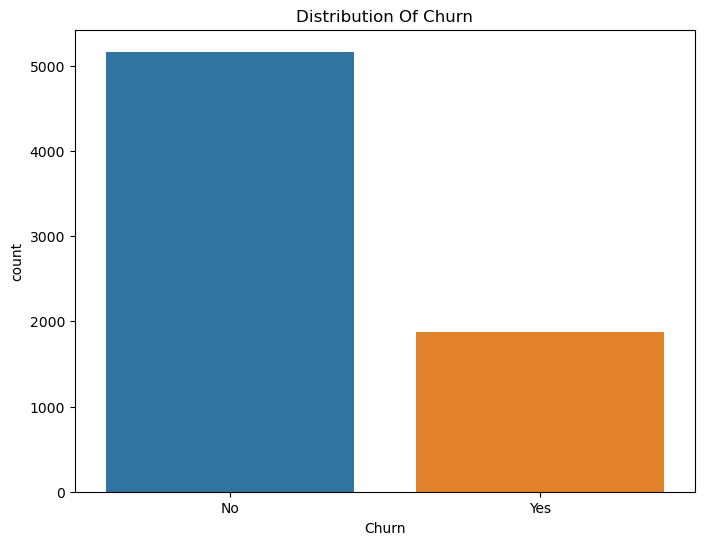

In [18]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x= 'Churn')
plt.title("Distribution Of Churn")

In [19]:
# factor analysis

In [20]:
# tenure - customers with high tenure are less likely to churn

Text(0, 0.5, 'Count')

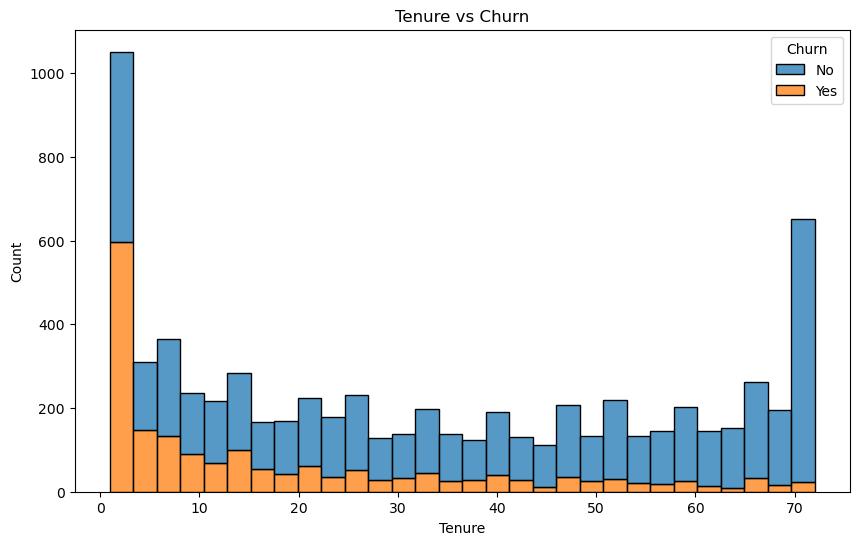

In [22]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'tenure', hue = 'Churn', multiple = 'stack',
           bins = 30)
plt.title("Tenure vs Churn")
plt.xlabel("Tenure")
plt.ylabel("Count")

In [23]:
# contract type vs churn

Text(0.5, 1.0, 'Tenure vs Churn')

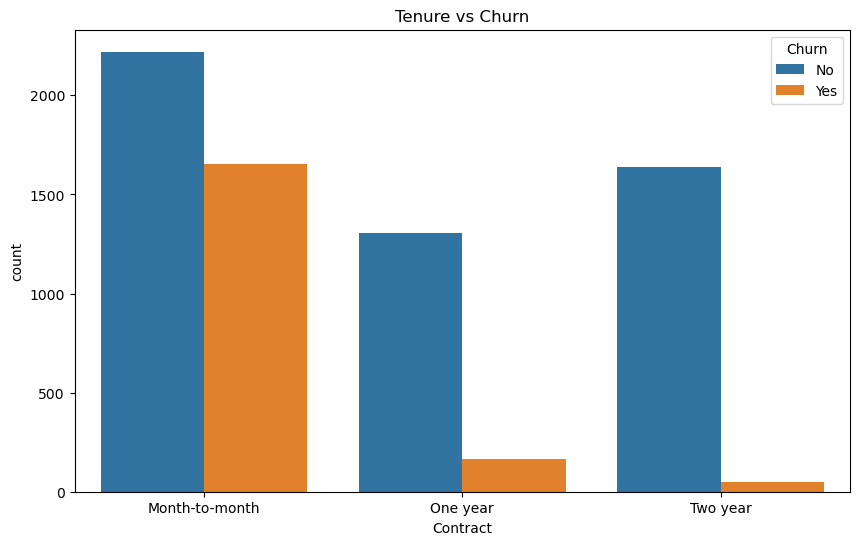

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x ='Contract', hue = "Churn")
plt.title("Tenure vs Churn")

In [25]:
# customers with m-to-m contracts are more likely to get churned

In [26]:
# monthly charges vs churn

Text(0.5, 1.0, 'Monthly charges vs churn')

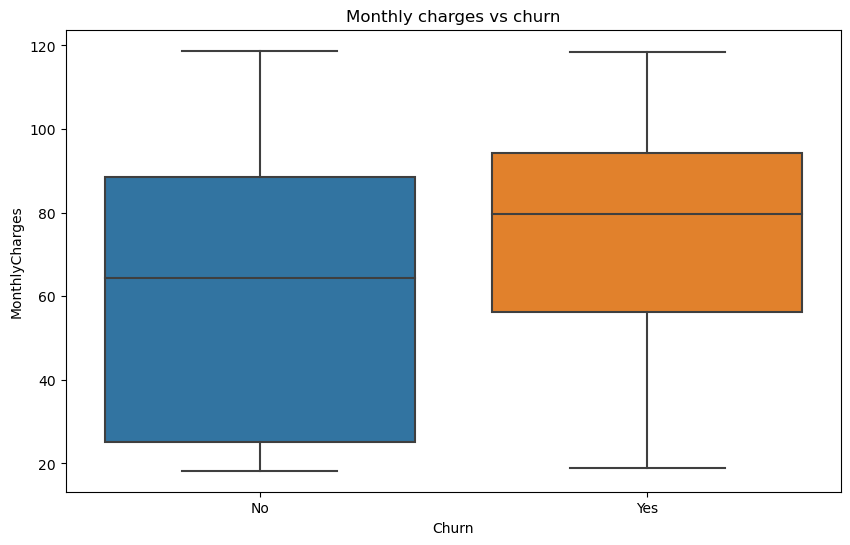

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges')
plt.title("Monthly charges vs churn")

In [28]:
# customers who got churned have higher monthly charges

In [29]:
# effect of internet service on churn

Text(0, 0.5, 'Count')

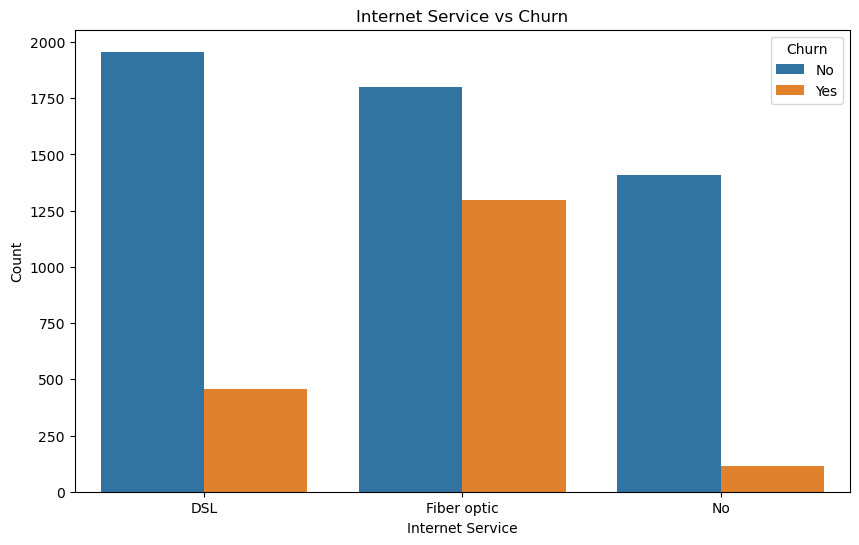

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')

In [31]:
# fiber optics - internet service has higher churn

In [32]:
# payments/ tech support

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 0, 'Payment Method')

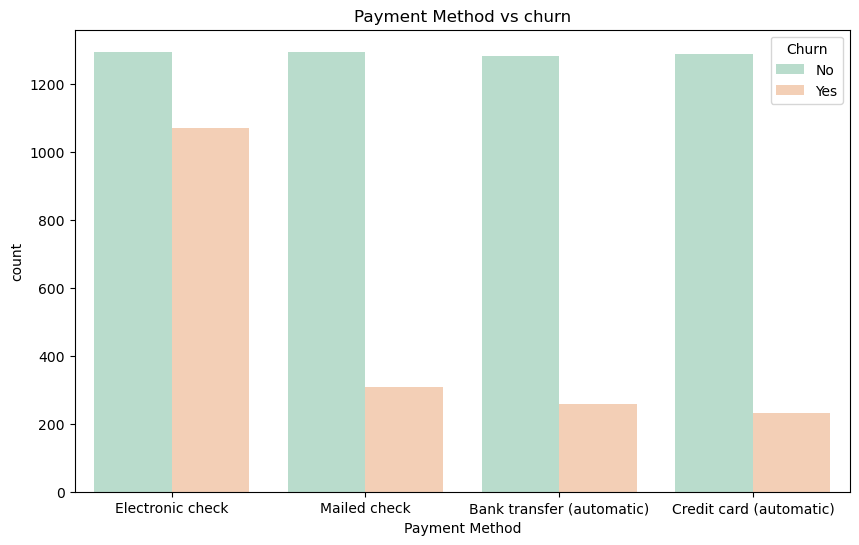

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x= 'PaymentMethod', hue = 'Churn', palette = 'Pastel2')
plt.title("Payment Method vs churn")
plt.xlabel("Payment Method")

In [36]:
# customers using electronic check have higher chances of churn

Text(0.5, 0, 'TechSupport')

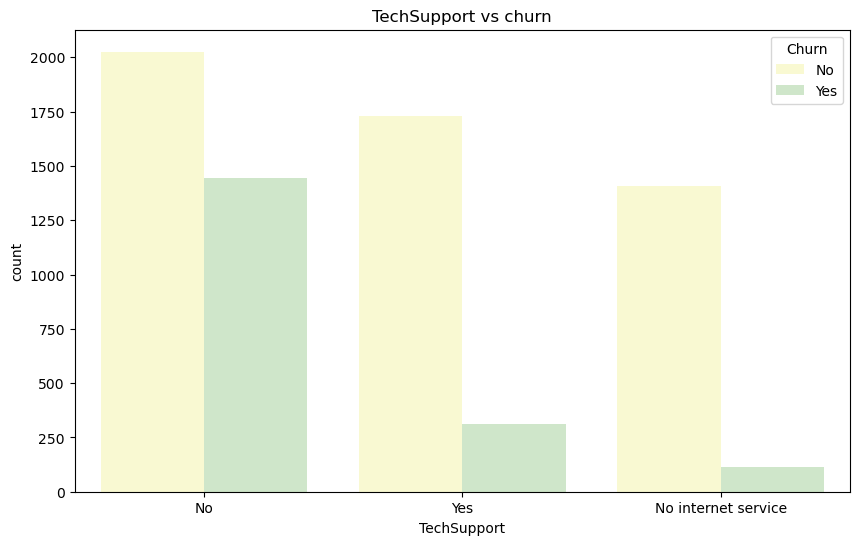

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x= 'TechSupport', hue = 'Churn', palette = 'Pastel1_r')
plt.title("TechSupport vs churn")
plt.xlabel("TechSupport")

In [41]:
# 'StreamingTV', 'StreamingMovies', 'DeviceProtection'

Text(0.5, 0, 'StreamingTV')

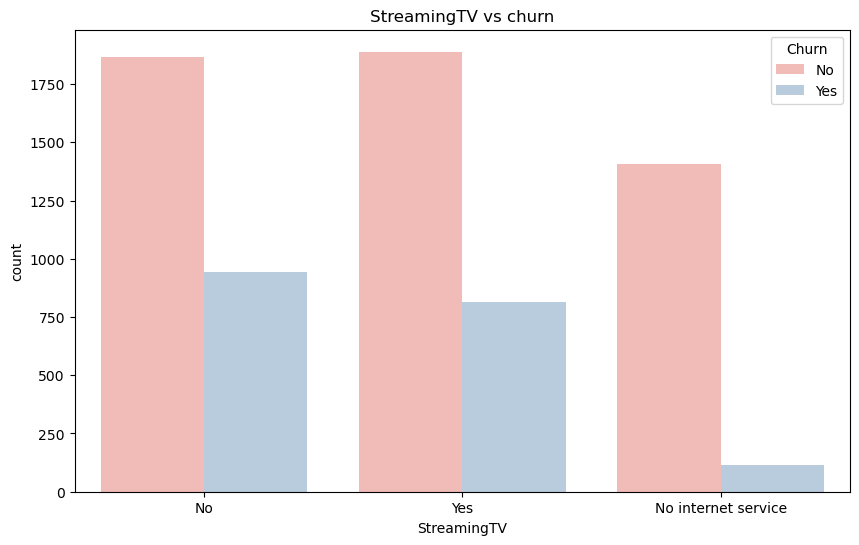

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x= 'StreamingTV', hue = 'Churn', palette = 'Pastel1')
plt.title("StreamingTV vs churn")
plt.xlabel("StreamingTV")

Text(0.5, 0, 'StreamingMovies')

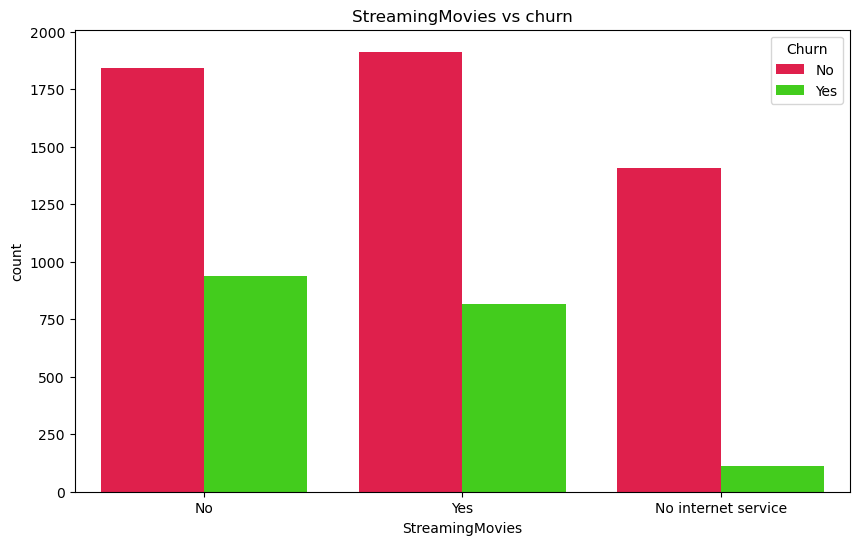

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x= 'StreamingMovies', hue = 'Churn', palette = 'prism_r')
plt.title("StreamingMovies vs churn")
plt.xlabel("StreamingMovies")

Text(0.5, 0, 'DeviceProtection')

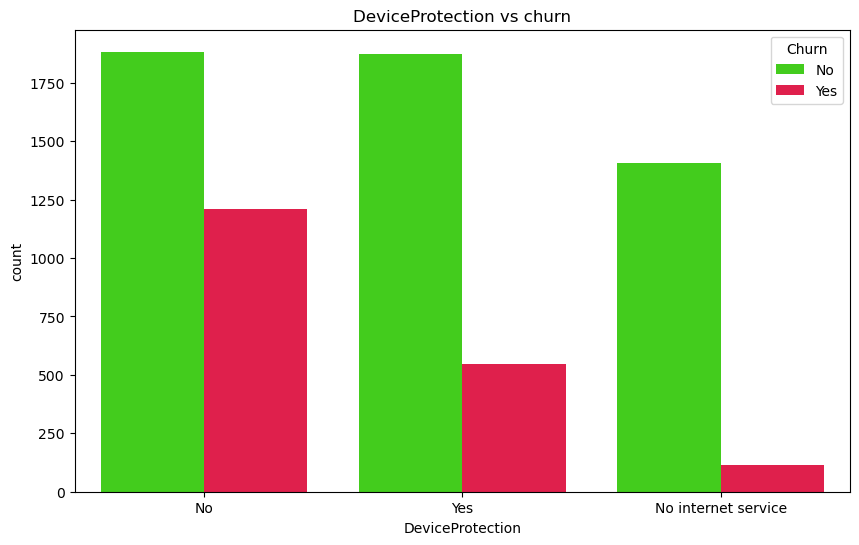

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x= 'DeviceProtection', hue = 'Churn', palette = 'prism')
plt.title("DeviceProtection vs churn")
plt.xlabel("DeviceProtection")

In [47]:
# class imbalance

In [48]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# cat --> numerical
# remove unwanted cols (customerID)

In [51]:
le = LabelEncoder()
for col in df.select_dtypes(include = ['object']):
    df[col] = le.fit_transform(df[col])

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [53]:
df = df.drop(['customerID'],axis = 1)

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [55]:
X = df.drop('Churn',axis = 1)
Y = df['Churn']

In [57]:
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state = 42)

In [59]:
smote = SMOTE(random_state = 42)
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

In [60]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_smote , y_train_smote)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rf.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.56      0.55       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



In [63]:
# build the model with only relevant features

In [64]:
fi = pd.DataFrame({'feature':X.columns,'importance':rf.feature_importances_})
fi = fi.sort_values('importance',ascending = False).head(10)

In [65]:
fi

,feature,importance
17,MonthlyCharges,0.139850
18,TotalCharges,0.137942
14,Contract,0.132059
4,tenure,0.118487
8,OnlineSecurity,0.089966
11,TechSupport,0.080967
16,PaymentMethod,0.042913
9,OnlineBackup,0.034905
2,Partner,0.028394
3,Dependents,0.028336


In [66]:
# parameters - random forest documentation
# gridsearch - list of parameters and values to be used for best results